# The Nordic Prior Knowledge Test in Programming
**Author**: [Sondre Sæther Bolland](https://www.uib.no/personer/Sondre.S%C3%A6ther.Bolland)

**Institution**: Department of Informatics, University of Bergen

**Email**: sondre.bolland@uib.no

## Introduction
The Nordic Prior Knowledge Test in Programming is a tool for assessing students’ programming skill. The test covers the fundamental elements of introductory programming taught at different universities and university colleges in Norway and Sweden. By testing the students in the concepts found in CS1 we aim for instructors to be better able to develop and adapt their courses to this new found prior knowledge.

This Notebook is a dynamic report of the results from 2024, designed to effectivly convey the findings of the test at the start of the semester. The (static) written report will be published sometime fall 2024 here: https://programmeringstesten.no/ 

### Imports

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy import stats

### Data
Before using this notebook two python scripts need to be run. A requirement to run these scripts is to have the csv file with the original dataset: `total.csv`. This must be placed in the `data` folder in the main directory (where this Notebook is located).

`clean_data.py` cleans certain columns for ambigious data and renames columns for analysis.

`grade_submissions.py` grades each question based on the rubric (`rubric.json`).

In [1129]:
!python clean_data.py
!python grade_submissions.py

Replace escape characters: dict_items([('&lt;', '<'), ('&gt;', '>'), ('&#61;', '='), ('&#34;', '"'), ('&#43;', '+')])
Replace all institution full names with their shorthand.
Replace all ambigious genders with standardized labels: ['m', 'f'] (other gender identities are not included)
3038 submissions.
Rename columns with simpler titles. Easier to use in analysis.
Removed all genders that are not in: ['m', 'f']. The other gender identities do not have a large enough sample size for valid statistical analysis.
Replace graduation years with: [2024, 2023, Before 2023]
Max score: 40.59999999999997
Submissions to be graded: 3038
Submissions graded.


### Dataset

In [194]:
# Specify the path of the data file
path = "data/"
filename = path + "results.csv"
df = pd.read_csv(filename, on_bad_lines="skip", delimiter=";", encoding="utf8")

# Remove all students who have taken a university level course
df = df[(df['UniversityExperience'] == 'Nei')]

C:\Users\fuf007\AppData\Local\Temp\ipykernel_21024\3654758810.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, on_bad_lines="skip", delimiter=";", encoding="utf8")


### Filter the dataframe
Do you want to look at a specific subset of students?
Use the next cell to filter the students based on your criteria.

To reset the dataframe, simply run the cell above.

In [195]:
# Filter by institution
specific_institutions = ['UiO'] # 'UiB', 'NTNU', 'UiS', 'HVL', 'UiO', 'Kristiania', 'NMBU', 'OsloMet', 'HiOf'
#df = df[(df['Institution'].isin(specific_institutions))]

In [196]:
# Filter by Graduate Year
specific_graduateyears = ['2023', '2024'] 
#df = df[(df['GraduateYear'].isin(specific_graduateyears))]

In [197]:
# Filter by Gender
specific_genders = ['f', 'm', ' '] # 'f', 'm', ' '
#df = df[(df['Gender'].isin(specific_genders))]

## Demographics
See the background of the students. Note that there are a large number of submissions that are blank for some of the following items. This is due to the students submitting ambigious answers, which have not been labled correctly by `clean_data.py`.

In [198]:
# Total number of students
print(f"The dataset has {len(df['Total'])} student submissions.")

The dataset has 2661 student submissions.



### Institutions

Institution
NTNU          928
UiO           543
UiS           334
UiB           333
NMBU          206
Kristiania    144
HiOf           95
HVL            75
Name: count, dtype: int64


<Axes: ylabel='count'>

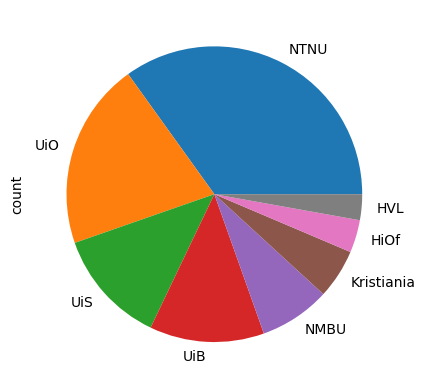

In [199]:
institutions = df.Institution.unique()

institution_column = "Institution"
print(df[institution_column].value_counts())
df[institution_column].value_counts().plot.pie()

### Graduate Year

GraduateYear
Before 2023    1433
2024            674
2023            554
Name: count, dtype: int64


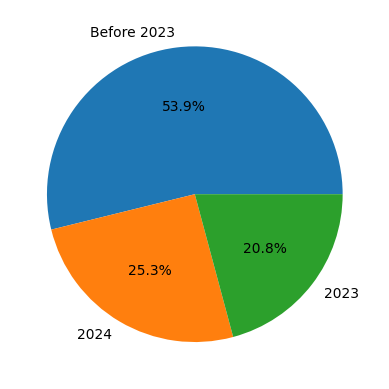

In [200]:
years = df.GraduateYear.unique()

graduateyear_column = "GraduateYear"
print(df[graduateyear_column].value_counts())
df[graduateyear_column].value_counts().plot.pie(autopct='%1.1f%%', ylabel='')
fig = plt.gcf()
plt.show()
fig.savefig('plots/graduateYear.png',dpi=300, bbox_inches='tight')

### Gender

Gender
m    1545
f     959
      157
Name: count, dtype: int64
Gender
m    0.580609
f    0.360391
     0.059000
Name: proportion, dtype: float64


<Axes: ylabel='count'>

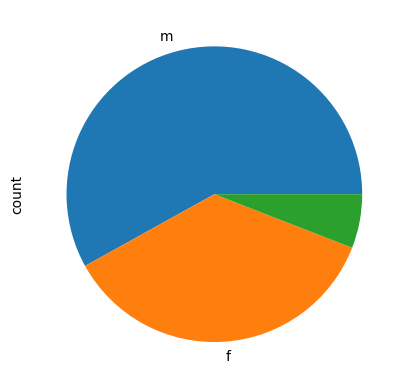

In [201]:
genders = df.Gender.unique()
gender_column = "Gender"

print(df[gender_column].value_counts())
print(df[gender_column].value_counts(normalize=True))
df[gender_column].value_counts().plot.pie()

## Educational Background
What experiences with programming do these students have? 

### Elective Programming Courses
During the secondary school phase, students have the option to take three elective courses in programming: *Information Technology 1* (IT1), *Information Technology 2* (IT2), and *Programming and Modelling X* (PMX). 

In [202]:
# Make new column for NO elective programming course
courses = ['Informasjonsteknologi 1 (IT1)', 'Informasjonsteknologi 2 (IT2)', 'Programmering og modellering X']
df_temp = df[(~df['IT1'].isin(courses))]
df_temp = df_temp[(~df_temp['IT2'].isin(courses))]
df_temp = df_temp[(~df_temp['PMX'].isin(courses))]
df_temp['NoElective'] = ~df_temp['IT1'].isin(courses)

df['NoElective'] = df_temp['NoElective']

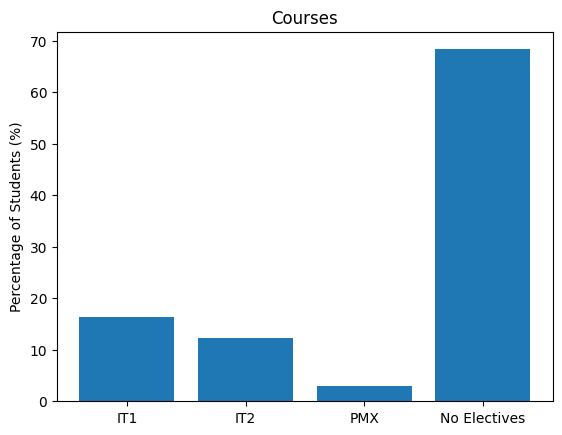

In [203]:
# Set up figure and axis
fig, ax = plt.subplots()

# Define courses and counts
courses = ['IT1', 'IT2', 'PMX', 'No Electives']
n_it1 = df['IT1'].value_counts()['Informasjonsteknologi 1 (IT1)']
n_it2 = df['IT2'].value_counts()['Informasjonsteknologi 2 (IT2)']
n_pmx = df['PMX'].value_counts()['Programmering og modellering X']
n_noelectives = df['NoElective'].value_counts()[True]
counts = [n_it1, n_it2, n_pmx, n_noelectives]

# Calculate percentages
total_students = sum(counts)
percentages = [(count / total_students) * 100 for count in counts]

# Plot the bar chart using percentages
ax.bar(courses, percentages)
ax.set_ylabel('Percentage of Students (%)')
ax.set_title('Courses')

# Show the plot
plt.show()

# Save the figure
fig.savefig('plots/programmingElectives_percentage.png', dpi=300, bbox_inches='tight')

### Math Courses
The most common math courses available in secondary school are:
 * Practical Math 1 (1P)
 * Practical Math 2 (2P)
 * Theoretical Math 1 (1T)
 * Social Science Math 1 (S1)
 * Social Science Math 2 (S2)
 * Natural Science Math 1 (R1)
 * Natural Science Math 2 (R2)

The majority of students who took the test belonged to STEM fields, where the typical admission requirement includes S1 and S2 or R1 mathematics. Certain math-intensive study programs may also demand R2 mathematics. Notably, most students had completed the Natural Science Math courses (see plot below), which is the most advanced option.

[438, 385, 1435, 320, 314, 1502, 1546]


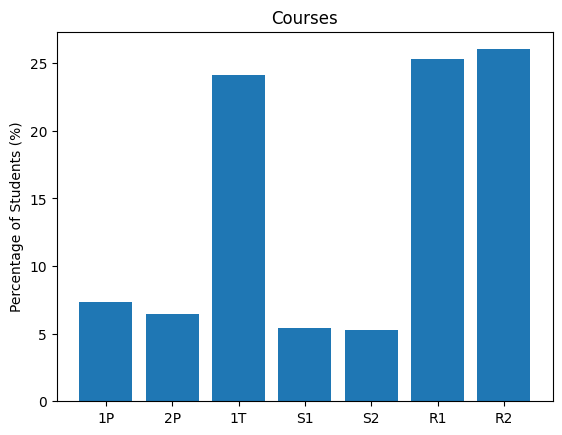

In [204]:
# Set up figure and axis
fig, ax = plt.subplots()

# Define courses
courses = ['1P', '2P', '1T', 'S1', 'S2', 'R1', 'R2']

# Initialize lists to store course data
gotten_courses = []
counts = []

# Collect counts for each course
for course in courses:
    try:
        count = df[course].value_counts()[course]
        counts.append(count)
        gotten_courses.append(course)
    except KeyError:
        continue

# Calculate percentages
total_students = sum(counts)
percentages = [(count / total_students) * 100 for count in counts]

# Plot the bar chart using percentages
ax.bar(gotten_courses, percentages)
ax.set_ylabel('Percentage of Students (%)')
ax.set_title('Courses')

# Show the plot
print(counts)
plt.show()

# Save the figure
fig.savefig('plots/courses_percentage.png', dpi=300, bbox_inches='tight')

### Experience outside of school
A source of programming knowledge is self-directed learning outside of formal education, where individuals independently explore the field, using resources like books and online materials. The following plot shows the distribution of students who report having at least 30 hours of outside experience with either block based or text based programming.

OutsideExperience
Nei    2098
Ja      555
Name: count, dtype: int64
OutsideExperience
Nei    0.790803
Ja     0.209197
Name: proportion, dtype: float64


<Axes: ylabel='count'>

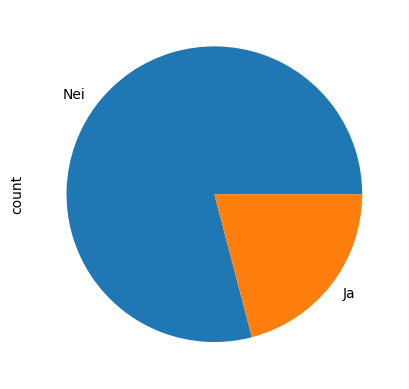

In [205]:
outside_column = "OutsideExperience"

print(df[outside_column].value_counts())
print(df[outside_column].value_counts(normalize=True))
df[outside_column].value_counts().plot.pie()

# Results
In this section of the report, the main results are presented before a review of the background the students have on the various study paths and what connection there is between background and results. Later we take a close look at how well they performed in specific programming tasks to understand their grasp of the different concepts.

In [206]:
# Configurations
bins = 20
max_points = 40.6 # i.e. range
edgecolor = 'black'
alpha = 0.5

## Main Result
A histogram of the total score of the students. Maximum score: 71.

Mean: 16.189
Standard deviation: 12.074


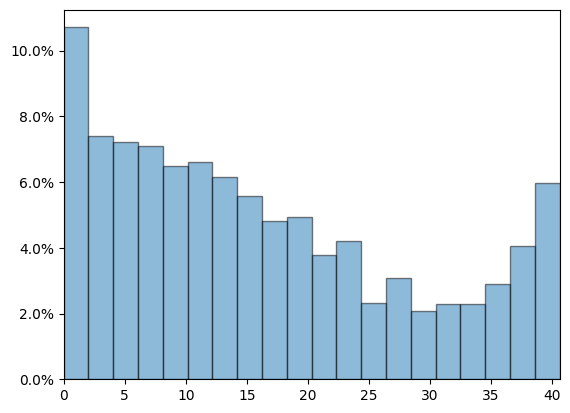

In [207]:
x = df['Total']

mean = df.loc[:, 'Total'].mean()
sd = df.loc[:, 'Total'].std()
print(f'Mean: {round(mean, 3)}')
print(f'Standard deviation: {round(sd, 3)}')

plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, weights=np.ones(len(x)) / len(x), range=[0, max_points])
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
#plt.hist(x, edgecolor=edgecolor, bins=bins, range=[0, max_points])
plt.margins(x=0.0001)
fig = plt.gcf()
plt.show()
fig.savefig('plots/allHist.png', dpi=300, bbox_inches='tight')

### Did the students find the test hard?
We asked the students to rate the test's difficulty on a Likert scale from 1 (very easy) to 7 (very hard)

<Axes: xlabel='difficulty'>

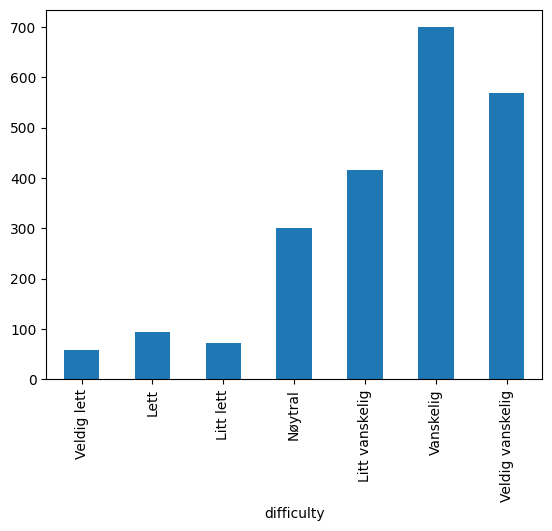

In [208]:
df['difficulty'].value_counts().loc[['Veldig lett', 'Lett', 'Litt lett', 'Nøytral', 'Litt vanskelig', 'Vanskelig', 'Veldig vanskelig']].plot.bar()

In [209]:
def compare_distributions(x, y, x_label, y_label, save_figure_name=''):
    n = len(x)
    mean = x.mean()
    sd = x.std()
    print(f'N students in {x_label}: {n}')
    print(f'Mean of {x_label}: {round(mean, 3)}')
    print(f'Standard deviation of {x_label}: {round(sd, 3)}')
    print()

    n = len(y)
    mean = y.mean()
    sd = y.std()
    print(f'N students in {y_label}: {n}')
    print(f'Mean of {y_label}: {round(mean, 3)}')
    print(f'Standard deviation of {y_label}: {round(sd, 3)}')
    
    plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, weights=np.ones(len(x)) / len(x), range=[0, max_points])
    plt.hist(y, bins=bins, alpha=alpha, edgecolor=edgecolor, label=y_label, weights=np.ones(len(y)) / len(y), range=[0, max_points])
    #plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, range=[0, max_points])
    #plt.hist(y, bins=bins, alpha=alpha, edgecolor=edgecolor, label=y_label, range=[0, max_points])
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.margins(x=0.0001)
    plt.legend(loc='upper right')
    fig = plt.gcf()
    plt.show()
    if save_figure_name != '':
        fig.savefig('plots/'+save_figure_name+'.png', dpi=300, bbox_inches='tight')

## Prior Programming Experience in Secondary School
In the initial segment of the test, we inquired with the students regarding their prior exposure to
programming before to commencing their higher education studies.

### Graduation Year
The educational reforms outlined in LK20 were introduced in the year 2020, resulting in programming becoming a compulsory component solely for those students who graduated in 2023 and onward.

In [210]:
# Significance test
def significane(group1, group2):
    # Perform Mann-Whitney U Test
    stat, p_value = stats.ranksums(group1, group2)
    
    # Print the test statistic and p-value
    print(f"Wilcox Rank-sum test: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation of p-value
    a = 0.05
    if p_value < a:
        print("Reject the null hypothesis: There is a significant difference between the two groups.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference between the two groups.")

N students in 2023 and 2024: 1228
Mean of 2023 and 2024: 20.253
Standard deviation of 2023 and 2024: 11.809

N students in Before 2023: 1433
Mean of Before 2023: 12.707
Standard deviation of Before 2023: 11.18


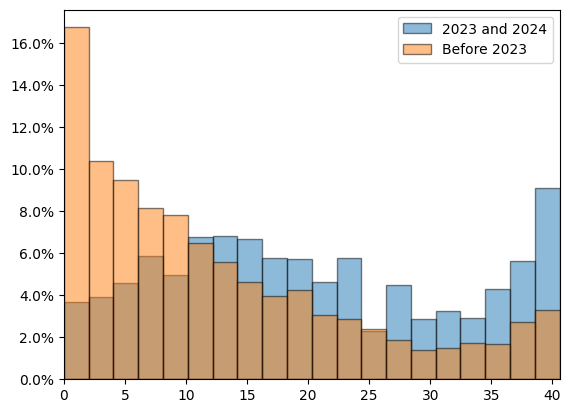

Wilcox Rank-sum test: 16.994743599138264
P-value: 8.9822258328567e-65
Reject the null hypothesis: There is a significant difference between the two groups.


In [211]:
years = df['GraduateYear']
x = df[(years.isin(['2023', '2024']))]['Total']
y = df[(~years.isin(['2023', '2024']))]['Total']
y = y[~np.isnan(y)]

x_label = '2023 and 2024'
y_label = 'Before 2023'

compare_distributions(x, y, x_label, y_label, 'graduateYearHist')
significane(x, y)

### Mathematics Courses

N students in 2P: 385
Mean of 2P: 9.574
Standard deviation of 2P: 9.339

N students in R2: 1546
Mean of R2: 19.518
Standard deviation of R2: 12.26


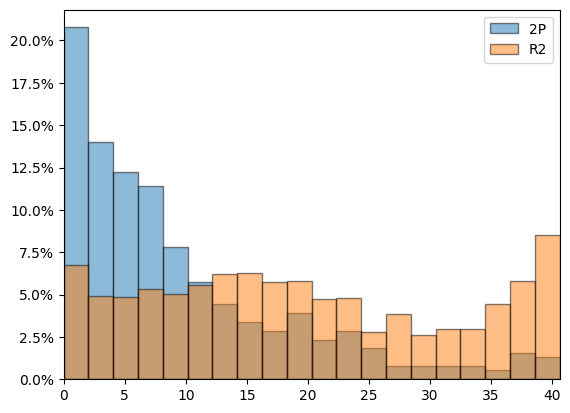

Wilcox Rank-sum test: -14.741318890551712
P-value: 3.498843585414536e-49
Reject the null hypothesis: There is a significant difference between the two groups.


In [212]:
x = df[(df['2P'].isin(['2P']))]['Total']
y = df[(df['R2'].isin(['R2']))]['Total']
y = y[~np.isnan(y)]

x_label = '2P'
y_label = 'R2'

compare_distributions(x, y, x_label, y_label)
significane(x, y)

### Programming Electives

N students in IT2: 369
Mean of IT2: 28.501
Standard deviation of IT2: 11.296

N students in NoElective: 2041
Mean of NoElective: 13.42
Standard deviation of NoElective: 10.529


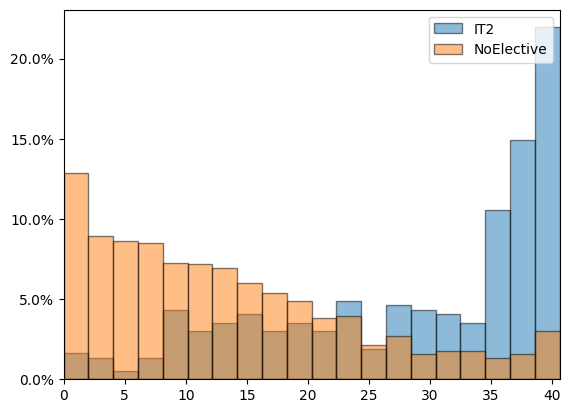

Wilcox Rank-sum test: 19.856087723573665
P-value: 9.762571668770306e-88
Reject the null hypothesis: There is a significant difference between the two groups.


In [213]:
x = df[(df['IT2'].isin(['Informasjonsteknologi 2 (IT2)']))]['Total']
y = df[(df['NoElective'].isin([True]))]['Total']
y = y[~np.isnan(y)]

x_label = 'IT2'
y_label = 'NoElective'

compare_distributions(x, y, x_label, y_label)
significane(x, y)

### Outside Experience

N students in Outside experience: 555
Mean of Outside experience: 26.681
Standard deviation of Outside experience: 11.716

N students in No outside experience: 2098
Mean of No outside experience: 13.402
Standard deviation of No outside experience: 10.543


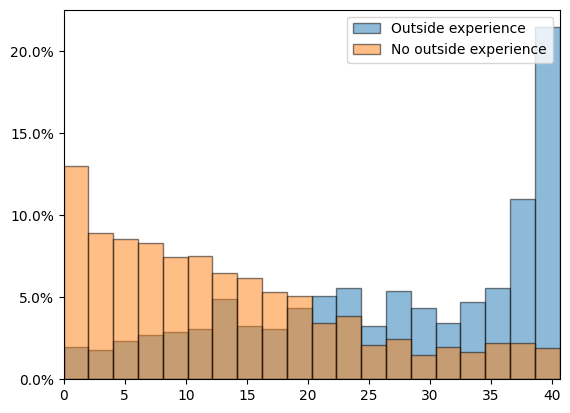

Wilcox Rank-sum test: 21.433379979201103
P-value: 6.526591735513856e-102
Reject the null hypothesis: There is a significant difference between the two groups.


In [214]:
x = df[(df['OutsideExperience'].isin(['Ja']))]['Total']
y = df[(df['OutsideExperience'].isin(['Nei']))]['Total']
y = y[~np.isnan(y)]

x_label = 'Outside experience'
y_label = 'No outside experience'

compare_distributions(x, y, x_label, y_label)
significane(x, y)

### How many students do not need introductory programming?
The students who perform very well on this test might not need CS1. If we set an (arbitrary) point threshold we can get an indication of how many students can perhaps move on to more advanced courses.

In [215]:
threshold = max_points * 0.9
x = df[df['Total'] > threshold]
n = len(x)
percentage = round((n/len(df))*100, 2)

print(f'Number of students with a score over {threshold}: {n} ({percentage}%)')

Number of students with a score over 36.54: 267 (10.03%)


### How many students have not learned much?

In [216]:
threshold = max_points * 0.2
x = df[df['Total'] < threshold]
n = len(x)
percentage = round((n/len(df))*100, 2)

print(f'Number of students with a score under {threshold}: {n} ({percentage}%)')

Number of students with a score under 8.120000000000001: 863 (32.43%)


### Gender

N students in women: 959
Mean of women: 11.736
Standard deviation of women: 10.177

N students in men: 1545
Mean of men: 18.862
Standard deviation of men: 12.339


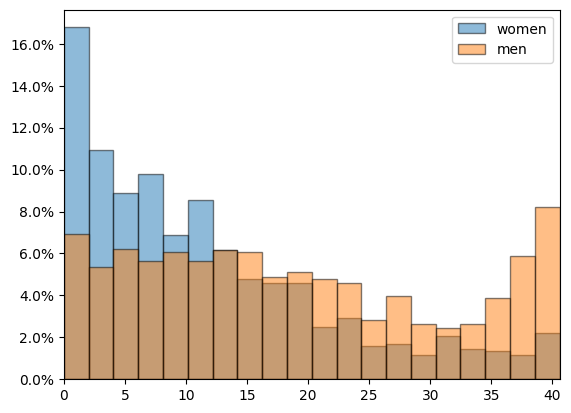

In [217]:
x = df[(df['Gender'] == 'f')]['Total']
y = df[(df['Gender'] == 'm')]['Total']

x_label = 'women'
y_label = 'men'

compare_distributions(x, y, x_label, y_label)

# Programming Tasks
Each task featured in the test pertained to a designated concept category. The following cells show the number of correct answers and the most common answers for each task.

## Correctness rate for each concept category
Below you can find the percentage of accurate responses achieved by the students for each concept.

Note that performance within each category may not exclusively reflect the students’ mastery of that programming concept. Variability in task difficulty plays a substantial role, with some tasks naturally being easier than others, irrespective of the underlying concept.

In [218]:
def correctnes_rate(columns, category, task_weight=1):
    correct_answer_rate = 0
    for column in columns:
        points_column = column + "_points"
        task_mean = df.loc[:, points_column].mean()
        correct_answer_rate += task_mean
    correct_answer_rate /= len(columns)*task_weight
    print(f'{category:15s} {correct_answer_rate*100:3.2f} %')

In [219]:
print("The students have the following average correctness rate for each concept category:")

# Datatypes
datatype_columns = ['datatypes1', 'datatypes2', 'datatypes3', 'datatypes4']
correctnes_rate(datatype_columns, "Datatypes")

# Operators
operator_columns = ['Operators1', 'Operators2', 'Operators3', 'Operators4', 'Operators5']
correctnes_rate(operator_columns, "Operators")

# Booleans
boolean_columns = ["100 == 100", "2 > 7", "(10 + 3) >= 13", "(10*2) < 9", "(1 + 3) < (2*3)", "(10.3 + 9) == (10.3 + 10)", "100 != 100", "(5 < 7) and (4 > 5)", "(5 < 7) or (4 > 5)", "(3 < 7) and (7 < 9)", "(3 < 7) or (7 < 9)", "not (100 != 100)", "True != True", "True and False", "True or False" , "True and True", "True or True", "not (True != True)", "n < 10", "100 == n", "(n < 7) and (4 > n)", "(n < 7) or (4 > n)", "n <= 5", "not (n < 10)"]
correctnes_rate(boolean_columns, "Booleans", task_weight=0.2)

# Variables
variable_columns = ["Variables1a", "Variables1b", "Variables2a", "Variables2b", "Variables3a", "Variables3b", "Variables4a", "Variables4b", "Variables5a", "Variables5b", "Variables5c", "Variables6a", "Variables6b", "Variables6c"]
correctnes_rate(variable_columns, "Variables", task_weight=0.2)

# Conditionals
conditional_columns = ["Conditionals1", "Conditionals2", "Conditionals3", "Conditionals4"]
correctnes_rate(conditional_columns, "Conditionals")

# Loops
loop_columns = ["Loops1", "Loops2", "Loops3", "Loops4", "Loops5", "Loops6", "Loops7"]
correctnes_rate(loop_columns, "Loops")

# Lists
list_columns = ["Lists1", "Lists2", "Lists3a", "Lists3b"]
correctnes_rate(list_columns, "Lists")

# Functions
function_columns = ["Functions1", "Functions2", "Functions3", "Functions4", "Functions5", "Functions6", "Functions7", "Functions8", "Functions9"]
correctnes_rate(function_columns, "Functions")

all_columns = datatype_columns + operator_columns + boolean_columns + variable_columns + conditional_columns + loop_columns + list_columns + function_columns

The students have the following average correctness rate for each concept category:
Datatypes       51.46 %
Operators       53.25 %
Booleans        60.67 %
Variables       49.47 %
Conditionals    55.06 %
Loops           27.01 %
Lists           31.79 %
Functions       20.07 %


## Tasks
To gain a deeper understanding of the students’ knowledge and comprehension of specific programming concepts, it is important to analyze their performance on these concepts. 

In [220]:
def print_task_result(task_column, df, n_answers=5, verbose_correct_answers=True):
    '''
    Print number of correct (1) and incorrect (0) responses.
    Print the top 5 most common answers.
    '''
    if verbose_correct_answers:
        task_point_column = task_column + "_points"
        print("Number of correct responses:")
        print(df[task_point_column].value_counts())
        print()
    
    print(f"Top {n_answers} most common answers:")
    try:
        print(df[task_column].value_counts()[:n_answers])
    except:
        print(df[task_column].value_counts())

# Datatypes
What datatype do the following variables have?
```python
a = 123
b = 1.23
c = '123'
d = [1, 2, 3]
```

In [221]:
print_task_result("datatypes1", df, 6, True)
print()
print_task_result("datatypes2", df, 6, True)
print()
print_task_result("datatypes3", df, 6, True)
print()
print_task_result("datatypes4", df, 6, True)

Number of correct responses:
datatypes1_points
0    1387
1    1274
Name: count, dtype: int64

Top 6 most common answers:
datatypes1
int             1274
Jeg vet ikke     943
str              153
float            150
list              86
bool              44
Name: count, dtype: int64

Number of correct responses:
datatypes2_points
0    1378
1    1283
Name: count, dtype: int64

Top 6 most common answers:
datatypes2
float           1283
Jeg vet ikke     961
int              182
str              131
bool              68
list              17
Name: count, dtype: int64

Number of correct responses:
datatypes3_points
0    1520
1    1141
Name: count, dtype: int64

Top 6 most common answers:
datatypes3
str             1141
Jeg vet ikke    1126
int              124
float            111
bool              97
list              34
Name: count, dtype: int64

Number of correct responses:
datatypes4_points
1    1779
0     882
Name: count, dtype: int64

Top 6 most common answers:
datatypes4
list         

# Operators

### Operators 1
What is the value of `result`?
```python
a = 12
result = a + a
```

In [222]:
print_task_result("Operators1", df, 4, True)

Number of correct responses:
Operators1_points
1    2134
0     527
Name: count, dtype: int64

Top 4 most common answers:
Operators1
24.0            2134
I don't know     352
12.0              28
6.0               17
Name: count, dtype: int64


### Operators 2
What is the value of `result`?
```python
a = 12
b = 1.23 

result = b + a
```

In [223]:
print_task_result("Operators2", df, 4, True)

Number of correct responses:
Operators2_points
1    1781
0     880
Name: count, dtype: int64

Top 4 most common answers:
Operators2
13.23           1781
I don't know     494
13.0              17
12.23              6
Name: count, dtype: int64


### Operators 3
What is the value of `result`?
```python
c = '123'
result = c + c
```

In [224]:
print_task_result("Operators3", df, 4, True)

Number of correct responses:
Operators3_points
0    1865
1     796
Name: count, dtype: int64

Top 4 most common answers:
Operators3
123123.0        796
I don't know    710
246.0           249
123.0            21
Name: count, dtype: int64


### Operators 4
What is printed here?
```python
n = 0
n = n + 1
n = n + 1

print(n)
```

In [225]:
print_task_result("Operators4", df, 4, True)

Number of correct responses:
Operators4_points
1    1614
0    1047
Name: count, dtype: int64

Top 4 most common answers:
Operators4
2.0             1614
I don't know     606
1.0              149
3.0               47
Name: count, dtype: int64


### Operators 5
What is printed here?
```python
n = 'b'
n = n + 'c'
n = n + 'a'

print(n)
```

In [261]:
print_task_result("Operators5", df, 4, True)

Number of correct responses:
Operators5_points
0    1901
1     760
Name: count, dtype: int64

Top 4 most common answers:
Operators5
I don't know    1039
bca              737
abc               27
b+c+a             24
Name: count, dtype: int64


# Variables

### Variables 1
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

a = b
```

In [227]:
print_task_result("Variables1a", df)
print_task_result("Variables1b", df)

Number of correct responses:
Variables1a_points
0.2    1454
0.0    1207
Name: count, dtype: int64

Top 5 most common answers:
Variables1a
20.0            1454
I don't know    1001
10.0             162
30.0               9
1.0                6
Name: count, dtype: int64
Number of correct responses:
Variables1b_points
0.2    1492
0.0    1169
Name: count, dtype: int64

Top 5 most common answers:
Variables1b
20.0            1492
I don't know    1001
10.0             121
2.0                5
30.0               5
Name: count, dtype: int64


### Variables 2
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

b = a
```

In [228]:
print_task_result("Variables2a", df)
print_task_result("Variables2b", df)

Number of correct responses:
Variables2a_points
0.2    1416
0.0    1245
Name: count, dtype: int64

Top 5 most common answers:
Variables2a
10.0            1416
I don't know    1049
20.0             151
2.0                3
30.0               3
Name: count, dtype: int64
Number of correct responses:
Variables2b_points
0.2    1361
0.0    1300
Name: count, dtype: int64

Top 5 most common answers:
Variables2b
10.0            1361
I don't know    1049
20.0             201
30.0               5
1.0                4
Name: count, dtype: int64


### Variables 3
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

a = b
b = a
```

In [229]:
print_task_result("Variables3a", df)
print_task_result("Variables3b", df)

Number of correct responses:
Variables3a_points
0.2    1360
0.0    1301
Name: count, dtype: int64

Top 5 most common answers:
Variables3a
20.0            1360
I don't know    1119
10.0             134
30.0               5
29.0               1
Name: count, dtype: int64
Number of correct responses:
Variables3b_points
0.0    1456
0.2    1205
Name: count, dtype: int64

Top 5 most common answers:
Variables3b
20.0            1205
I don't know    1119
10.0             289
30.0               4
2.0                1
Name: count, dtype: int64


### Variables 4
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

b = a
a = b
```

In [230]:
print_task_result("Variables4a", df)
print_task_result("Variables4b", df)

Number of correct responses:
Variables4a_points
0.0    1435
0.2    1226
Name: count, dtype: int64

Top 5 most common answers:
Variables4a
10.0            1226
I don't know    1149
20.0             232
30.0               5
40.0               3
Name: count, dtype: int64
Number of correct responses:
Variables4b_points
0.0    1377
0.2    1284
Name: count, dtype: int64

Top 5 most common answers:
Variables4b
10.0            1284
I don't know    1149
20.0             175
30.0               4
2.0                2
Name: count, dtype: int64


### Variables 5
What is the value of variables `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = b
b = c
```

In [231]:
print_task_result("Variables5a", df)
print_task_result("Variables5b", df)
print_task_result("Variables5c", df)

Number of correct responses:
Variables5a_points
0.2    1335
0.0    1326
Name: count, dtype: int64

Top 5 most common answers:
Variables5a
20.0            1335
I don't know    1125
30.0              76
10.0              76
1.0                3
Name: count, dtype: int64
Number of correct responses:
Variables5b_points
0.2    1395
0.0    1266
Name: count, dtype: int64

Top 5 most common answers:
Variables5b
30.0            1395
I don't know    1125
20.0              54
10.0              36
2.0                2
Name: count, dtype: int64
Number of correct responses:
Variables5c_points
0.2    1390
0.0    1271
Name: count, dtype: int64

Top 5 most common answers:
Variables5c
30.0            1390
I don't know    1125
10.0              40
20.0              39
60.0               4
Name: count, dtype: int64


### Variables 6
What is the value of variables `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = c
b = a
c = b
```

In [232]:
print_task_result("Variables6a", df)
print_task_result("Variables6b", df)
print_task_result("Variables6c", df)

Number of correct responses:
Variables6a_points
0.2    1332
0.0    1329
Name: count, dtype: int64

Top 5 most common answers:
Variables6a
30.0            1332
I don't know    1160
20.0              58
10.0              40
0.0                3
Name: count, dtype: int64
Number of correct responses:
Variables6b_points
0.0    1566
0.2    1095
Name: count, dtype: int64

Top 5 most common answers:
Variables6b
I don't know    1160
30.0            1095
10.0             284
20.0              51
0.0                2
Name: count, dtype: int64
Number of correct responses:
Variables6c_points
0.0    1576
0.2    1085
Name: count, dtype: int64

Top 5 most common answers:
Variables6c
I don't know    1160
30.0            1085
20.0             251
10.0              97
60.0               3
Name: count, dtype: int64


## Booleans

### Booleans 1
What do these boolean expressions evaluate to?

In [233]:
print_task_result("100 == 100", df, 3, False)
print()
print_task_result("2 > 7", df, 3, False)
print()
print_task_result("(10 + 3) >= 13", df, 3, False)
print()
print_task_result("(10*2) < 9", df, 3, False)
print()
print_task_result("(1 + 3) < (2*3)", df, 3, False)
print()
print_task_result("(10.3 + 9) == (10.3 + 10)", df, 3, False)

Top 3 most common answers:
100 == 100
TRUE            2072
Jeg vet ikke     465
FALSE             67
Name: count, dtype: int64

Top 3 most common answers:
2 > 7
FALSE           2308
Jeg vet ikke     213
TRUE              92
Name: count, dtype: int64

Top 3 most common answers:
(10 + 3) >= 13
TRUE            1899
FALSE            353
Jeg vet ikke     353
Name: count, dtype: int64

Top 3 most common answers:
(10*2) < 9
FALSE           2249
Jeg vet ikke     239
TRUE             114
Name: count, dtype: int64

Top 3 most common answers:
(1 + 3) < (2*3)
TRUE            2199
Jeg vet ikke     260
FALSE            146
Name: count, dtype: int64

Top 3 most common answers:
(10.3 + 9) == (10.3 + 10)
FALSE           2037
Jeg vet ikke     487
TRUE              83
Name: count, dtype: int64


### Booleans 2
What do these boolean expressions evaluate to?

In [234]:
print_task_result("100 != 100", df, 3, False)
print()
print_task_result("(5 < 7) and (4 > 5)", df, 3, False)
print()
print_task_result("(5 < 7) or (4 > 5)", df, 3, False)
print()
print_task_result("(3 < 7) and (7 < 9)", df, 3, False)
print()
print_task_result("(3 < 7) or (7 < 9)", df, 3, False)
print()
print_task_result("not (100 != 100)", df, 3, False)

Top 3 most common answers:
100 != 100
FALSE           1393
Jeg vet ikke    1096
TRUE             108
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) and (4 > 5)
FALSE           1932
Jeg vet ikke     572
TRUE              95
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) or (4 > 5)
TRUE            1312
Jeg vet ikke     756
FALSE            530
Name: count, dtype: int64

Top 3 most common answers:
(3 < 7) and (7 < 9)
TRUE            1923
Jeg vet ikke     586
FALSE             78
Name: count, dtype: int64

Top 3 most common answers:
(3 < 7) or (7 < 9)
TRUE            1552
Jeg vet ikke     744
FALSE            293
Name: count, dtype: int64

Top 3 most common answers:
not (100 != 100)
Jeg vet ikke    1444
TRUE             999
FALSE            154
Name: count, dtype: int64


### Booleans 3
What do these boolean expressions evaluate to?

In [235]:
print_task_result("True != True", df, 3, False)
print()
print_task_result("True and False", df, 3, False)
print()
print_task_result("True or False", df, 3, False)
print()
print_task_result("True and True", df, 3, False)
print()
print_task_result("True or True", df, 3, False)
print()
print_task_result("not (True != True)", df, 3, False)

Top 3 most common answers:
True != True
Jeg vet ikke    1340
FALSE           1119
TRUE             133
Name: count, dtype: int64

Top 3 most common answers:
True and False
Jeg vet ikke    1323
FALSE           1076
TRUE             184
Name: count, dtype: int64

Top 3 most common answers:
True or False
Jeg vet ikke    1270
TRUE            1181
FALSE            131
Name: count, dtype: int64

Top 3 most common answers:
True and True
TRUE            1285
Jeg vet ikke    1158
FALSE            146
Name: count, dtype: int64

Top 3 most common answers:
True or True
Jeg vet ikke    1205
TRUE            1026
FALSE            352
Name: count, dtype: int64

Top 3 most common answers:
not (True != True)
Jeg vet ikke    1541
TRUE             825
FALSE            218
Name: count, dtype: int64


### Booleans 4
Given the variable `n = 5`, what do these boolean expressions evaluate to?

In [236]:
print_task_result("n < 10", df, 3, False)
print()
print_task_result("100 == n", df, 3, False)
print()
print_task_result("(n < 7) and (4 > n)", df, 3, False)
print()
print_task_result("(n < 7) or (4 > n)", df, 3, False)
print()
print_task_result("n <= 5", df, 3, False)
print()
print_task_result("not (n < 10)", df, 3, False)

Top 3 most common answers:
n < 10
TRUE            2080
Jeg vet ikke     353
FALSE            162
Name: count, dtype: int64

Top 3 most common answers:
100 == n
FALSE           1905
Jeg vet ikke     634
TRUE              59
Name: count, dtype: int64

Top 3 most common answers:
(n < 7) and (4 > n)
FALSE           1890
Jeg vet ikke     519
TRUE             175
Name: count, dtype: int64

Top 3 most common answers:
(n < 7) or (4 > n)
TRUE            1452
Jeg vet ikke     643
FALSE            489
Name: count, dtype: int64

Top 3 most common answers:
n <= 5
TRUE            1816
Jeg vet ikke     588
FALSE            194
Name: count, dtype: int64

Top 3 most common answers:
not (n < 10)
FALSE           1216
Jeg vet ikke    1083
TRUE             294
Name: count, dtype: int64


## Conditionals

### Conditionals 1
What does this code snippet print?

```python
if 2 > 7:
    print(1)
```

In [237]:
print_task_result("Conditionals1", df)

Number of correct responses:
Conditionals1_points
1    1750
0     911
Name: count, dtype: int64

Top 5 most common answers:
Conditionals1
Ingenting       1750
Jeg vet ikke     505
1                373
Name: count, dtype: int64


### Conditionals 2
What does this code snippet print?

```python
if 100 != 100:
    print(1)
else:
    print(2)
```

In [238]:
print_task_result("Conditionals2", df)

Number of correct responses:
Conditionals2_points
0    1395
1    1266
Name: count, dtype: int64

Top 5 most common answers:
Conditionals2
2               1266
Jeg vet ikke    1018
1                184
1 og 2           103
Ingenting         55
Name: count, dtype: int64


### Conditionals 3
What does this code snippet print?

```python
if (10*2) < 9:
    print(1)
elif 100 == 100:
    print(2)
else:
    print(3)
```

In [239]:
print_task_result("Conditionals3", df)

Number of correct responses:
Conditionals3_points
1    1423
0    1238
Name: count, dtype: int64

Top 5 most common answers:
Conditionals3
2               1423
Jeg vet ikke     773
2 og 3           155
3                 73
1 og 2            70
Name: count, dtype: int64


### Conditionals 4
What does this code snippet print?

```python
if 100 == 100:
    print(1)
if (1 + 3) < (2*3):
    print(2)
else:
    print(3)
```

In [240]:
print_task_result("Conditionals4", df)

Number of correct responses:
Conditionals4_points
1    1422
0    1239
Name: count, dtype: int64

Top 5 most common answers:
Conditionals4
1 og 2          1422
Jeg vet ikke     776
1                170
1, 2 og 3         76
2                 60
Name: count, dtype: int64


## Loops

### Loops 1
What does this code snippet print?

```python
n = 0
while n < 10:
    n = n + 1

print(n)
```

In [241]:
print_task_result("Loops1", df)

Number of correct responses:
Loops1_points
0    1843
1     818
Name: count, dtype: int64

Top 5 most common answers:
Loops1
I don't know    841
10.0            818
1.0             354
9.0             266
123456789.0     145
Name: count, dtype: int64


### Loops 2
What does this code snippet print?

```python
n = 0
while n < 10:
    n = n + 2

print(n)
```

In [242]:
print_task_result("Loops2", df)

Number of correct responses:
Loops2_points
0    1912
1     749
Name: count, dtype: int64

Top 5 most common answers:
Loops2
I don't know    863
10.0            749
2.0             346
8.0             239
2468.0          143
Name: count, dtype: int64


### Loops 3
What does this code snippet print?

```python
n = 100
while n < 10:
    n = n + 2

print(n)
```

In [243]:
print_task_result("Loops3", df)

Number of correct responses:
Loops3_points
0    1486
1    1175
Name: count, dtype: int64

Top 5 most common answers:
Loops3
100             1175
I don't know    1084
0                 99
102               81
2                 19
Name: count, dtype: int64


### Loops 4
What does this code snippet print?

```python
n = 0
while (n < 7) and (4 > n):
    n = n + 1

print(n)
```

In [244]:
print_task_result("Loops4", df)

Number of correct responses:
Loops4_points
0    1999
1     662
Name: count, dtype: int64

Top 5 most common answers:
Loops4
I don't know    1085
4.0              662
1.0              243
3.0              209
0.0              117
Name: count, dtype: int64


### Loops 5
What does this code snippet print?

```python
n = 0
ls = [1, 1, 3]
for e in ls:
    n = n + e

print(n)
```

In [245]:
print_task_result("Loops5", df)

Number of correct responses:
Loops5_points
0    2027
1     634
Name: count, dtype: int64

Top 5 most common answers:
Loops5
I don't know    1761
5.0              634
0.0               45
3.0               32
113.0             24
Name: count, dtype: int64


### Loops 6
What does this code snippet print?

```python
n = 0
ls = [-1, 4, -3, 0, -10, 5]
for e in ls:
    if e > 0:
        n = n + e

print(n)
```

In [246]:
print_task_result("Loops6", df)

Number of correct responses:
Loops6_points
0    2123
1     538
Name: count, dtype: int64

Top 5 most common answers:
Loops6
I don't know    1807
9.0              538
0.0               62
-5.0              28
5.0               20
Name: count, dtype: int64


## Lists

### Lists 1
What does this code snippet print?

```python
ls = [10, 20, 30]
print(ls[1])
```

In [247]:
print_task_result("Lists1", df)

Number of correct responses:
Lists1_points
0    1933
1     728
Name: count, dtype: int64

Top 5 most common answers:
Lists1
I don't know    1185
20.0             728
10.0             582
102030.0          50
60.0              14
Name: count, dtype: int64


### Lists 2
What does this code snippet print?

```python
ls = [10, 20, 30]
ls[1] = ls[1] + 5

print(ls[1])
```

In [248]:
print_task_result("Lists2", df)

Number of correct responses:
Lists2_points
0    1946
1     715
Name: count, dtype: int64

Top 5 most common answers:
Lists2
I don't know    1251
25.0             715
15.0             521
152535.0          20
65.0              12
Name: count, dtype: int64


### Lists 3
What does this code snippet print?

```python
a = [10, 20, 30]
b = [5, 15, 25]

b[1] = a[1] + b[1]

print(a)
print(b)
```

In [249]:
print_task_result("Lists3a", df)
print_task_result("Lists3b", df)

Number of correct responses:
Lists3a_points
0    1372
1    1289
Name: count, dtype: int64

Top 5 most common answers:
Lists3a
[10, 20, 30]    1289
Jeg vet ikke    1074
[15, 35, 55]      61
[5, 15, 25]       32
[10, 35, 30]      15
Name: count, dtype: int64
Number of correct responses:
Lists3b_points
0    2009
1     652
Name: count, dtype: int64

Top 5 most common answers:
Lists3b
Jeg vet ikke    1338
[5, 35, 25]      652
[15, 35, 55]     341
[5, 15, 25]      146
[10, 35, 30]      29
Name: count, dtype: int64


## Functions

### Functions 1
What does this code snippet print?

```python
def f(a, b):
    return a + b

print(f(5, 10))
```

In [250]:
print_task_result("Functions1", df)

Number of correct responses:
Functions1_points
0    1547
1    1114
Name: count, dtype: int64

Top 5 most common answers:
Functions1
I don't know    1397
15.0            1114
5.1               27
510.0             14
10.0               2
Name: count, dtype: int64


### Functions 2
What does this code snippet print?

```python
def f(a):
    if a:
        return 1
    else:
        return 2

print(f(100 == 100))
```

In [251]:
print_task_result("Functions2", df)

Number of correct responses:
Functions2_points
0    1907
1     754
Name: count, dtype: int64

Top 5 most common answers:
Functions2
I don't know    1665
1.0              754
2.0               71
100.0             56
99.0               2
Name: count, dtype: int64


### Functions 3
What does this code snippet print?

```python
def f():
    if 100 == 100:
        return 1
    if (1 + 3) < (2*3):
        return 2
    else:
        return 3

print(f())
```

In [252]:
print_task_result("Functions3", df)

Number of correct responses:
Functions3_points
0    2293
1     368
Name: count, dtype: int64

Top 5 most common answers:
Functions3
I don't know    1648
1.0              368
12.0             219
1.2              127
2.0               75
Name: count, dtype: int64


### Functions 4
What does this code snippet print?

```python
def f(n, a):
    if a:
        n = n + 1
    return n

print(f(5, (10*2) < 9))
```

In [253]:
print_task_result("Functions4", df)

Number of correct responses:
Functions4_points
0    2168
1     493
Name: count, dtype: int64

Top 5 most common answers:
Functions4
I don't know    1933
5.0              493
6.0               48
0.0               14
1.0                4
Name: count, dtype: int64


### Functions 5
What does this code snippet print?

```python
def f(n):
    while n < 10:
        n = n + 1
    return n

print(f(5))
```

In [254]:
print_task_result("Functions5", df)

Number of correct responses:
Functions5_points
0    2105
1     556
Name: count, dtype: int64

Top 5 most common answers:
Functions5
I don't know    1490
10.0             556
6.0              215
9.0               92
5.0               85
Name: count, dtype: int64


### Functions 6
What does this code snippet print?

```python
def f(s, ls):
    for e in ls:
        s = s + e
    return s

print(f('abc', ['x', 'y', 'z']))
```

In [255]:
print_task_result("Functions6", df)

Number of correct responses:
Functions6_points
0    2249
1     412
Name: count, dtype: int64

Top 5 most common answers:
Functions6
I don't know    2014
abcxyz           403
abc               10
abcxabcyabcz      10
Abcxyz             9
Name: count, dtype: int64


### Functions 7
What does this code snippet print?

```python
def f(n, ls):
    return ls[n]

print(f(2, ['a', 'b', 'c']))
```

In [256]:
print_task_result("Functions7", df)

Number of correct responses:
Functions7_points
0    2177
1     484
Name: count, dtype: int64

Top 5 most common answers:
Functions7
I don't know    1895
c                464
b                 62
C                 20
2                 12
Name: count, dtype: int64


### Functions 8
What does this code snippet print?

```python
def f(n, ls):
    return ls[1] + n

print(f(5, [10, 20, 30]))
```

In [257]:
print_task_result("Functions8", df)

Number of correct responses:
Functions8_points
0    2137
1     524
Name: count, dtype: int64

Top 5 most common answers:
Functions8
I don't know    1852
25.0             524
15.0              96
152535.0           9
65.0               6
Name: count, dtype: int64


### Functions 9
What does this code snippet print?

```python
def f(n, ls):
    for e in ls:
        ls[n] = ls[n] + e
    return ls[n]

print(f(1, [10, 20, 30]))
```

In [258]:
print_task_result("Functions9", df)

Number of correct responses:
Functions9_points
0    2560
1     101
Name: count, dtype: int64

Top 5 most common answers:
Functions9
I don't know    2027
80.0             171
90.0             101
21.0              26
60.0              24
Name: count, dtype: int64
